In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16003, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 16003 (delta 21), reused 20 (delta 13), pack-reused 15967
Receiving objects: 100% (16003/16003), 14.60 MiB | 34.52 MiB/s, done.
Resolving deltas: 100% (10987/10987), done.


In [2]:
%cd /content/yolov5/

/content/yolov5


In [3]:
!pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.9/618.9 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00


In [4]:
# 모듈 import
import torch
from IPython.display import Image, clear_output, display
from glob import glob
import numpy as np
import cv2
import random
import yaml

In [5]:
%mkdir /content/yolov5/bic
%cd /content/yolov5/bic

/content/yolov5/bic


In [8]:
!pip install gdown
!gdown --id 1SjZK9eCopV6hK8up9Wt2erXAtGhAroZv --output /content/yolov5/bic/bic.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SjZK9eCopV6hK8up9Wt2erXAtGhAroZv
To: /content/yolov5/bic/bic.zip
100% 112M/112M [00:00<00:00, 248MB/s] 


In [9]:
!unzip bic.zip
!rm bic.zip

Archive:  bic.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: train/
   creating: train/images/
 extracting: train/images/IMG_CON_CRANE_DOOR_A_20210612093658_716158_jpg.rf.27afca6fd874065f8684e055ad45b817.jpg  
 extracting: train/images/IMG_CON_CRANE_DOOR_A_20210612100916_716158_jpg.rf.44bed24c00666f5be6f2193afc9240a6.jpg  
 extracting: train/images/IMG_CON_CRANE_DOOR_A_20210612101046_716158_jpg.rf.1328609f40e1deb22b99c475b0ca7842.jpg  
 extracting: train/images/IMG_CON_CRANE_DOOR_A_20210612101204_716158_jpg.rf.df10d65736e306e4172293620546e7cb.jpg  
 extracting: train/images/IMG_CON_CRANE_DOOR_A_20210612101354_716158_jpg.rf.bc4b63c2d45f13089309571947afee69.jpg  
 extracting: train/images/IMG_CON_CRANE_DOOR_A_20210612101519_716158_jpg.rf.379e1d4ad17510d278761c325de9662a.jpg  
 extracting: train/images/IMG_CON_CRANE_DOOR_A_20210612101843_716417_jpg.rf.aa3aeec4668e064ea2a1af105f410b23.jpg  
 extracting: tra

# /content/yolov5/bic/train 이 폴더 밖으로 옮기고 실행


In [ ]:
# 폴더 생성 및 이동
%mkdir /content/yolov5/bic/train/
%mkdir /content/yolov5/bic/train/images
%mkdir /content/yolov5/bic/train/labels

%mkdir  /content/yolov5/bic/valid
%mkdir /content/yolov5/bic/valid/images
%mkdir /content/yolov5/bic/valid/labels

In [ ]:
# 데이터 확인하기
import torch
from IPython.display import Image, clear_output
from glob import glob

img_list=glob('/content/train/images/*.jpg')
txt_list=glob('/content/train/labels/*.txt')

print(len(img_list), len(txt_list))

1019 1019


In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(img_list, txt_list,
                                                    test_size=0.2, random_state=1)

In [ ]:
import os
import shutil

In [ ]:
for path in X_train:
  shutil.move(path, "/content/yolov5/bic/train/images/")

len(glob('/content/yolov5/bic/train/images/*.jpg'))

815

In [ ]:
for path in y_train:
  shutil.move(path, "/content/yolov5/bic/train/labels/")

len(glob('/content/yolov5/bic/train/labels/*.txt'))

815

In [ ]:
for path in X_test:
  shutil.move(path, "/content/yolov5/bic/valid/images/")

len(glob('/content/yolov5/bic/valid/images/*.jpg'))

204

In [ ]:
for path in y_test:
  shutil.move(path, "/content/yolov5/bic/valid/labels/")

len(glob('/content/yolov5/bic/valid/labels/*.txt'))

204

In [ ]:
!pwd

/content/yolov5/bic


In [ ]:
train_img_list=glob('/train/images/*.jpg')
valid_img_list=glob('/valid/images/*.jpg')

In [ ]:
with open('/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/valid.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

In [ ]:
# IPython에서 입력된 내용을 텍스트처럼 계속 사용하기 위한 registe_line_cell_magic 정의
from IPython.core.magic import register_line_cell_magic

# register_line_cell_magic을 이용해 IPython에서 바로 사용할 수 있게 정의
# writetimplate를 쉽게 사용할 수 있음
@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/bic/data.yaml

train: /content/yolov5/bic/train/images
val: /content/yolov5/bic/valid/images

nc: 5
names: ['BIC', 'DOOR', 'IMDG', 'TANK', 'TYPESIZE']

roboflow:
  workspace: project-ja1pk
  project: -2-jzr3o
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-ja1pk/-2-jzr3o/dataset/4



In [ ]:
# 개별 수정후 저장된 코드 확인
%cat /content/yolov5/bic/data.yaml


train: /content/yolov5/bic/train/images
val: /content/yolov5/bic/valid/images

nc: 5
names: ['BIC', 'DOOR', 'IMDG', 'TANK', 'TYPESIZE']

roboflow:
  workspace: project-ja1pk
  project: -2-jzr3o
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-ja1pk/-2-jzr3o/dataset/4



In [ ]:
with open('/content/yolov5/bic/data.yaml', 'r') as stream:
  num_classes=str(yaml.safe_load(stream)['nc'])

print(num_classes)

5


In [ ]:
%cat /content/yolov5/models/yolov5m.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.67  # model depth multiple
width_multiple: 0.75  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5m.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: {num_classes} # number of classes
depth_multiple: 0.67  # model depth multiple
width_multiple: 0.75  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
!cat /content/yolov5/models/custom_yolov5m.yaml


# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 5 # number of classes
depth_multiple: 0.67  # model depth multiple
width_multiple: 0.75  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
%cd /content/yolov5/

/content/yolov5


In [ ]:
!python /content/yolov5/train.py --img 960 --batch 16 --epochs 50 --data /content/yolov5/bic/data.yaml --cfg ./models/custom_yolov5m.yaml --weight /content/yolov5m.pt --name bic_results --cache


train: weights=/content/yolov5m.pt, cfg=./models/custom_yolov5m.yaml, data=/content/yolov5/bic/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=960, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=bic_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, a

Torch:2.0.1+cu118(Tesla T4)


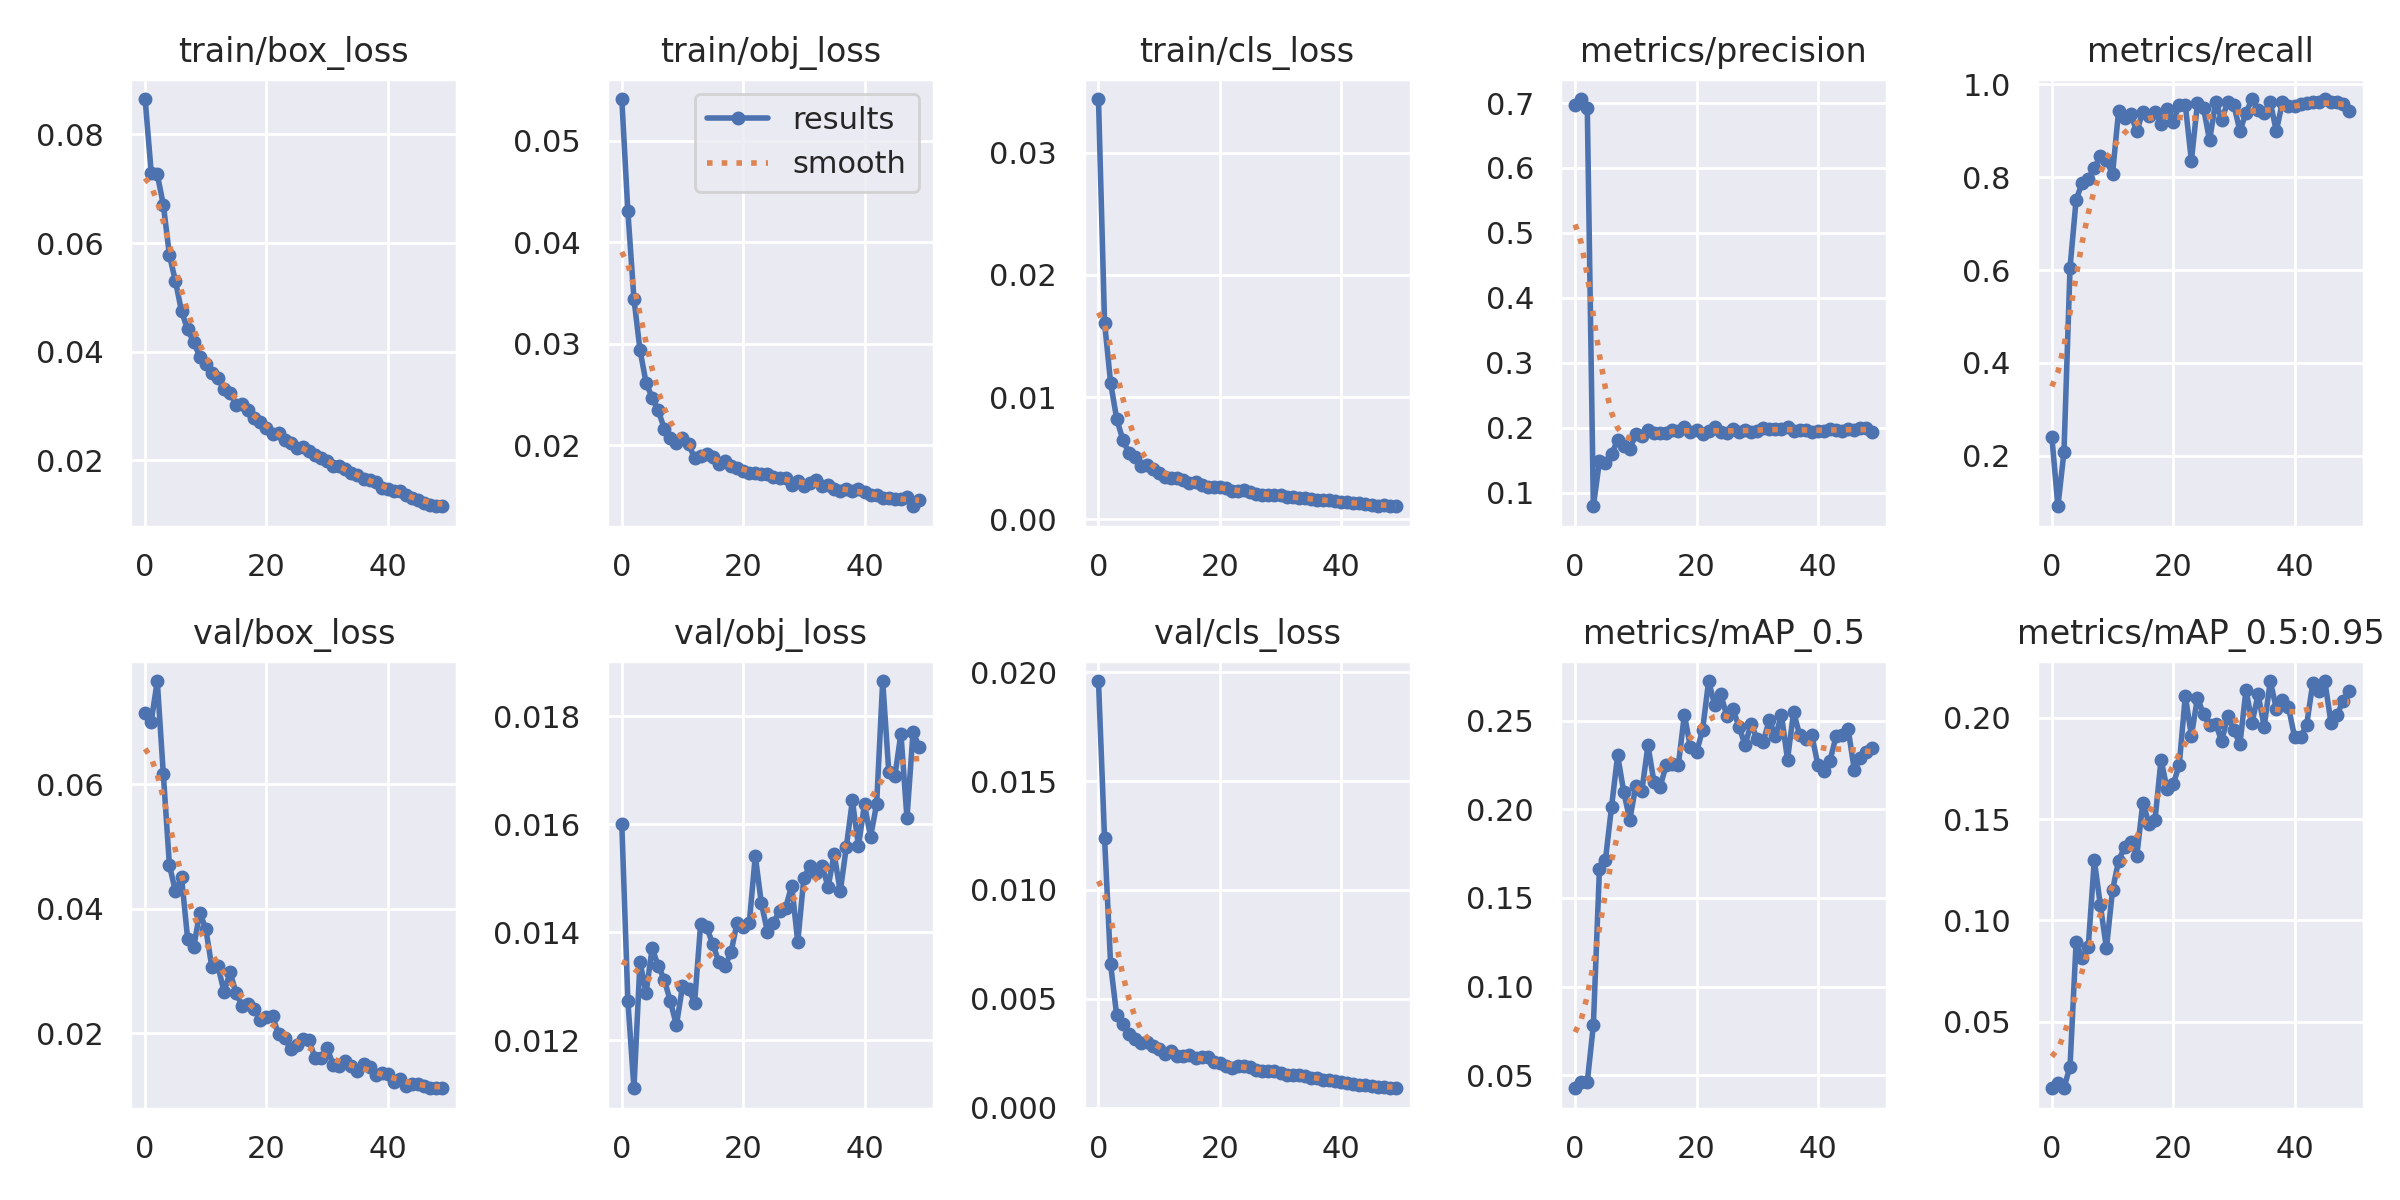

In [ ]:

import torch
from IPython.display import Image, clear_output
import yaml
print(f"Torch:{torch.__version__}\
({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Image(filename='/content/yolov5/runs/train/bic_results/results.png', width=800)

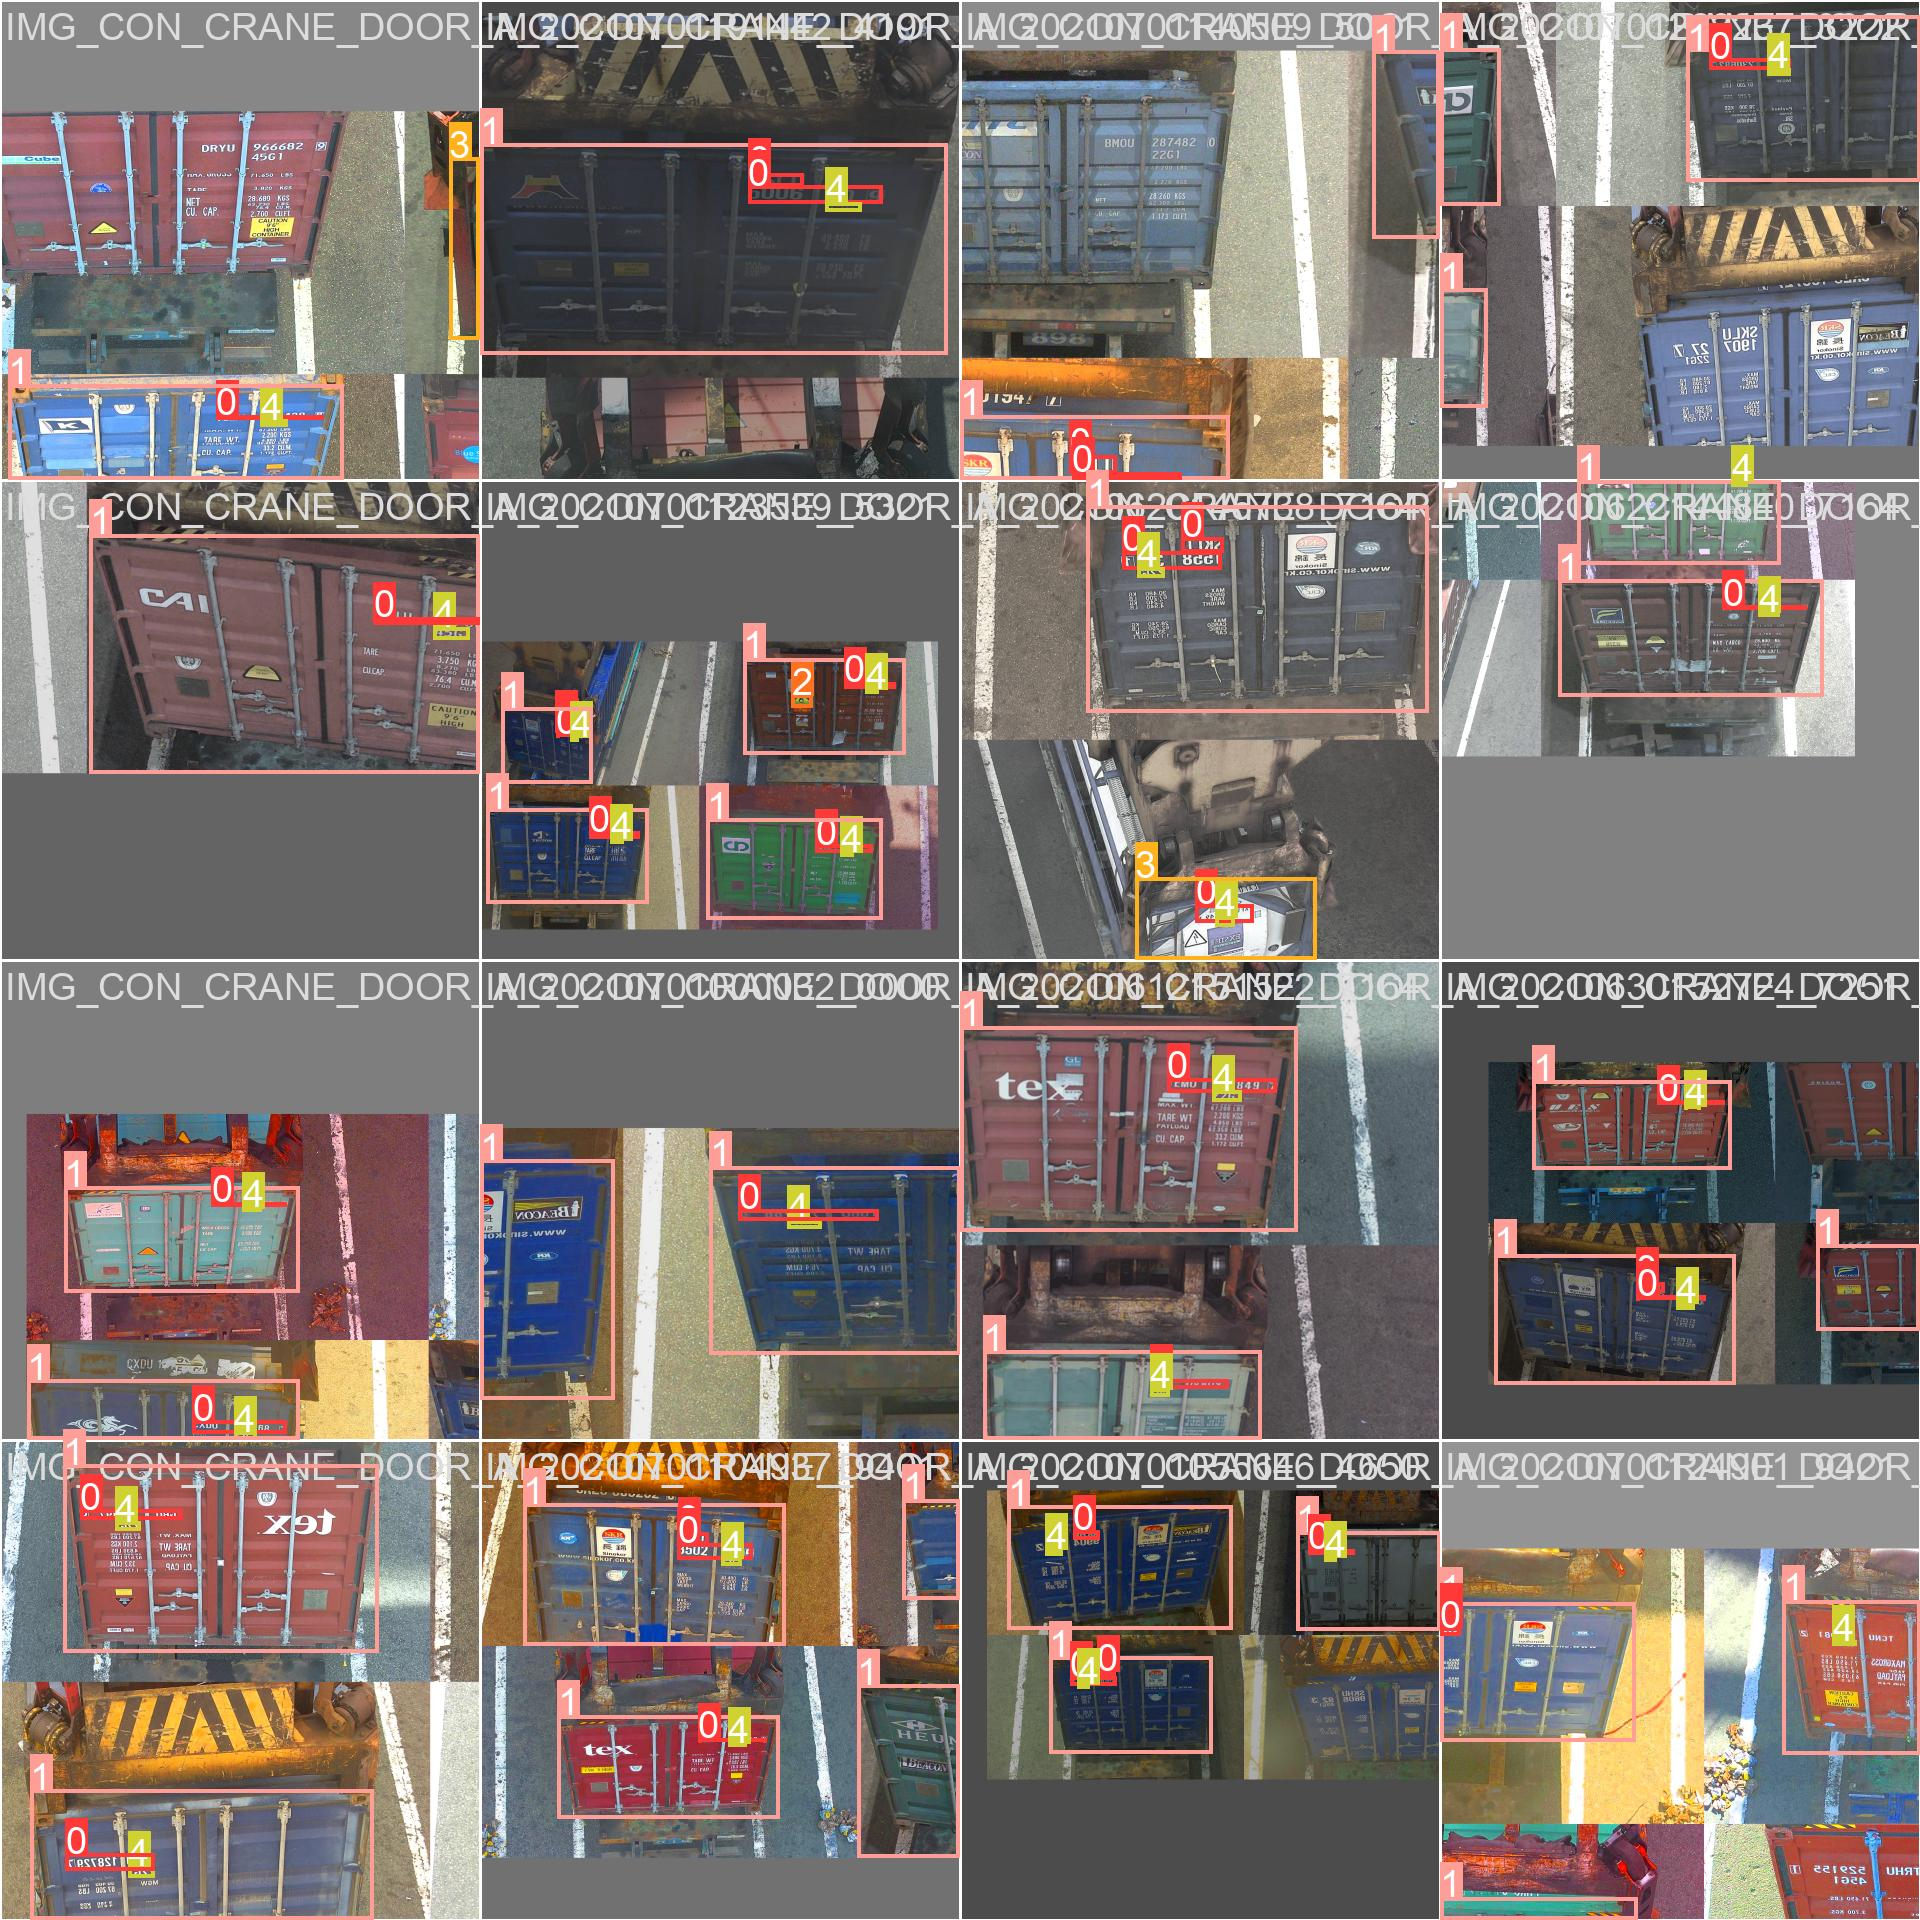

In [ ]:
Image(filename='/content/yolov5/runs/train/bic_results/train_batch0.jpg', width=800)

In [ ]:
!python val.py --weights runs/train/bic_results/weights/best.pt --data /content/yolov5/bic/data.yaml \
--img 940 --iou 0.65 --half

val: data=/content/yolov5/bic/data.yaml, weights=['runs/train/bic_results/weights/best.pt'], batch_size=32, imgsz=940, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 20869098 parameters, 0 gradients, 47.9 GFLOPs
WARNING ⚠️ --img-size 940 must be multiple of max stride 32, updating to 960
val: Scanning /content/yolov5/bic/valid/labels.cache... 40 images, 164 backgrounds, 0 corrupt: 100% 204/204 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:05<00:00,  1.21it/s]
                   all        204        132      0.195      0.962      0.257       0.22
                  

https://drive.google.com/file/d/1AzO9LB8qSxgJ-Lgg5axtZqc3zIX1BBhq/view?usp=sharing

https://drive.google.com/file/d/1ZB1cb1EFZqfVfcMehUihjWN8dOtAWrus/view?usp=sharing

In [ ]:
import torch
import cv2
from IPython.display import Image, clear_output

In [ ]:
%mkdir -p runs/detect/exp/labels


In [ ]:
!python detect.py --weights /content/yolov5/runs/train/bic_results/weights/best.pt --source /content/drive/MyDrive/예비프로젝트yolo/bic_test_image --imgsz 960 --conf 0.4 --save-txt --exist-ok


detect: weights=['/content/yolov5/runs/train/bic_results/weights/best.pt'], source=/content/drive/MyDrive/예비프로젝트yolo/bic_test_image, data=data/coco128.yaml, imgsz=[960, 960], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 20869098 parameters, 0 gradients, 47.9 GFLOPs
image 1/100 /content/drive/MyDrive/예비프로젝트yolo/bic_test_image/IMG_CON_CRANE_DOOR_B_20210925205130_150203_jpg.rf.1835f6a2b8fe6df14336e85f5654c219.jpg: 544x960 1 BIC, 1 DOOR, 3 IMDGs, 1 TYPESIZE, 50.9ms
image 2/100 /content/drive/MyDrive/예비프로젝트yolo/bic

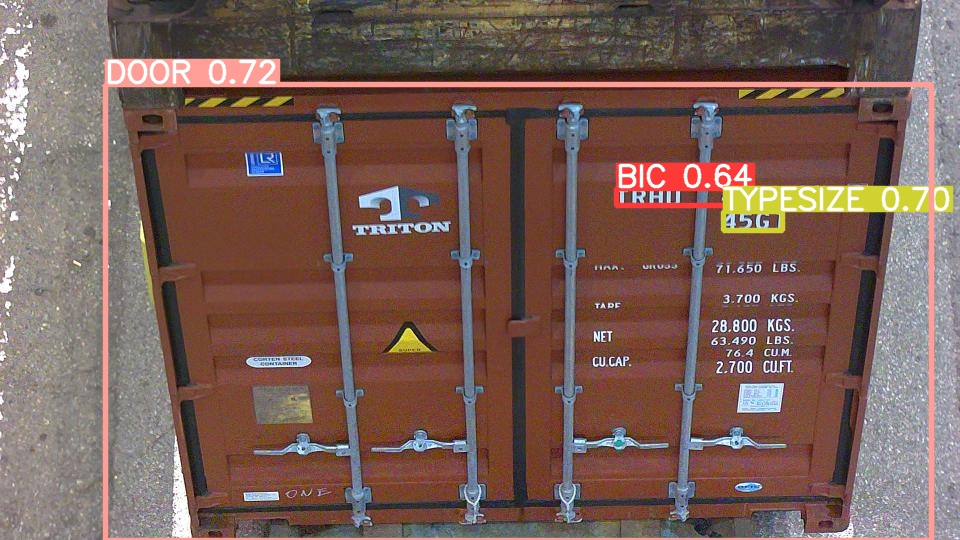

In [ ]:
import random
from glob import glob

image_name = random.choice(glob('/content/yolov5/runs/detect/exp/*jpg'))
Image(filename=image_name)

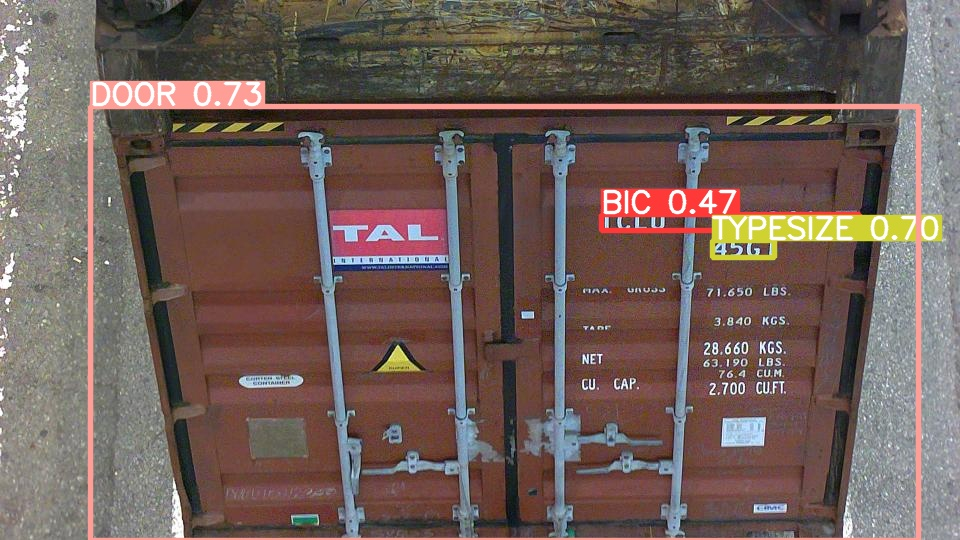

In [ ]:
image_name = random.choice(glob('/content/yolov5/runs/detect/exp/*jpg'))
Image(filename=image_name)

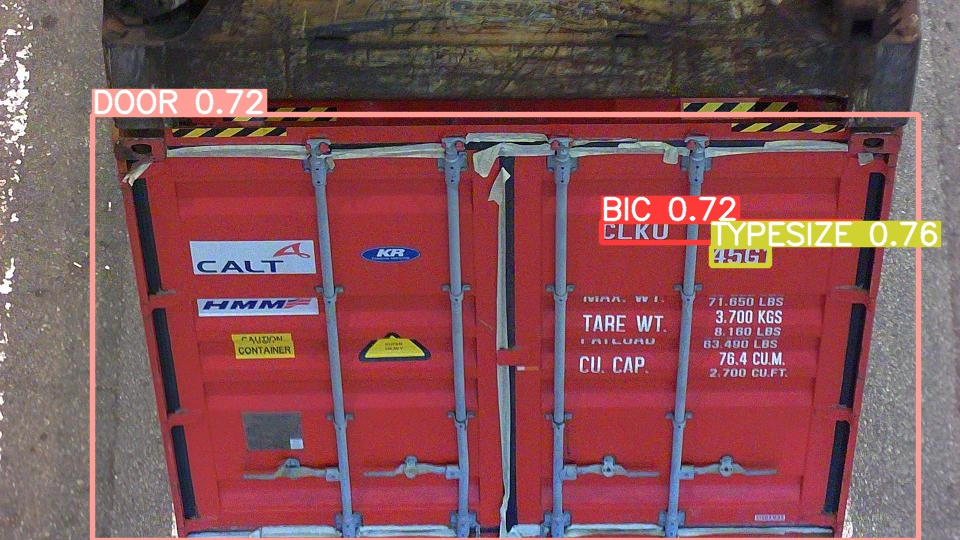

In [ ]:
image_name = random.choice(glob('/content/yolov5/runs/detect/exp/*jpg'))
Image(filename=image_name)

In [ ]:
import yaml

# data.yaml 파일 경로
data_yaml_path = '/content/yolov5/bic/data.yaml'

# data.yaml 파일 읽기
with open(data_yaml_path, 'r') as file:
    data = yaml.safe_load(file)

# 클래스 개수
num_classes = data['nc']

# 클래스 이름
class_names = data['names']

# 클래스 개수와 이름 출력
print("Number of Classes:", num_classes)
print("Class Names:", class_names)


Number of Classes: 5
Class Names: ['BIC', 'DOOR', 'IMDG', 'TANK', 'TYPESIZE']


In [ ]:
import os
import cv2

# 이미지가 있는 디렉토리 경로(디텍션할떄 사용한 이미지경로)
image_dir = '/content/drive/MyDrive/예비프로젝트yolo/bic_test_image'
# 라벨 파일이 있는 디렉토리 경로
label_dir = '/content/yolov5/runs/detect/labels'
# 결과를 저장할 디렉토리 경로
output_dir = '/content/yolov5/runs/detect/extracted_objects'

# 추출할 클래스 번호
target_class = 0

# 결과를 저장할 디렉토리 생성
os.makedirs(output_dir, exist_ok=True)

# 이미지 파일 목록을 가져옴
image_files = os.listdir(image_dir)

# 이미지 파일을 하나씩 처리
for image_file in image_files:
    # 이미지 파일 경로
    image_path = os.path.join(image_dir, image_file)

    # 라벨 파일 경로
    label_file = image_file.replace('.jpg', '.txt')
    label_path = os.path.join(label_dir, label_file)

    # 라벨 파일이 존재하고 디렉토리가 아닌 경우에만 처리
    if os.path.isfile(label_path):
        # 라벨 파일을 열고 클래스 번호가 target_class인 객체를 추출
        with open(label_path, 'r') as label_file:
            lines = label_file.readlines()

        for line in lines:
            parts = line.strip().split()
            class_number = int(parts[0])

            if class_number == target_class:
                x_center = float(parts[1])
                y_center = float(parts[2])
                width = float(parts[3])
                height = float(parts[4])

                # 이미지 불러오기
                image = cv2.imread(image_path)

                # 객체의 좌표와 크기를 통해 객체 추출
                image_height, image_width, _ = image.shape
                x = int((x_center - width/2) * image_width)
                y = int((y_center - height/2) * image_height)
                w = int(width * image_width)
                h = int(height * image_height)

                # 이미지 크기를 좀 더 크게 조정
                x -= w // 4
                y -= h // 4
                w += w // 2
                h += h // 2

                # 추출한 객체 이미지 크기 조정 후 저장
                output_path = os.path.join(output_dir, f"{image_file.replace('.jpg', f'_{class_number}.jpg')}")
                object_image = image[y:y+h, x:x+w]
                cv2.imwrite(output_path, object_image)
    else:
        print(f"Label file not found for image: {image_file}")

print(f"Extraction completed. Objects are saved in {output_dir}")


Extraction completed. Objects are saved in /content/yolov5/runs/detect/extracted_objects


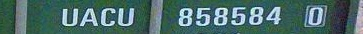

In [ ]:
image_name = random.choice(glob('/content/yolov5/runs/detect/extracted_objects/*jpg'))
Image(filename=image_name)